In [1]:
using PyPlot

# Aufgabe 1

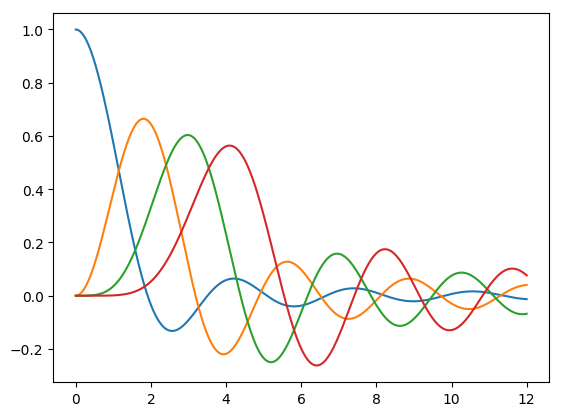

4-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5a635f310>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5a635f510>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5a635f650>
 PyObject <matplotlib.lines.Line2D object at 0x7fd5a635f790>

In [2]:
dt = 0.01 # Zeitintervall

k = 1 # Federkonstante
m = 1 # Masse
a = 1 # abstand

N = 50 # Anzahl der gekoppelten Oszillatoren
step_cnt = Int(12*(1/dt)) # Anzahl der Stützstellen pro Massepunkt

ys = zeros(Float64, step_cnt, N) # Auslenkungen zum Zeitpunkt n*dt

ys[1,1] = 1 # Anfangswerte aus Aufgabe

f1(n) = (1/a)*(ys[n-1,2]/a - ys[n-1,1]/a)*((k*a^2)/m) # Beschleunigung, die auf den ersten Massepunkt wirkt
fi(n, i) = (1/a)*((ys[n-1,i+1] - ys[n-1,i])/a - (ys[n-1,i] - ys[n-1, i-1])/a)*((k*a^2)/m) # Beschleunigung, die auf den i-ten Massepunkt wirkt
fN(n) = -(1/a)*(ys[n-1, N]/a - ys[n-1,N-1]/a)*((k*a^2)/m) # Beschleunigung, die auf den letzten (N-ten) Massepunkt wirkt

vs = zeros(Float64, N) # Momentane Geschwindigkeit des Massepunkts n

for n in 2:step_cnt    
    # Zunächst die Momentane Geschwindigkeit jedes Massepunkts anpassen
    vs[1] = vs[1] + dt*f1(n) # Eulerschritt für ersten Massepunkt
    for i in 2:(N-1)
        vs[i] = vs[i] + dt*fi(n, i) # Mittlere Massepunkte
    end
    vs[N] = vs[N] + dt*fN(n) # Letzter Massepunkt
    
    ys[n,:] = ys[n-1,:] + dt*vs[:] # noch mal Euler mit den Momentanen Geschwindigkeiten um auf die Momentane Auslenkung zu kommen
end

plot(linspace(0, 12, step_cnt), ys[:,1:4])
# TODO: labels uns legende

# Aufgabe 2
### Teil a
Das Minimum des verschobenen harmonischen Oszillators liegt bei:
$$
    \frac {dV} {dx} = m \omega^2 x + \theta \sqrt {2 \frac{m\omega}{\hbar}} \overset{!}{=} 0
    \Leftrightarrow x_{min} = - \frac {\theta \sqrt {2 \frac{m\omega}{\hbar}}} {m \omega^2} \\
    \Leftrightarrow V_{min} = - \frac{\theta^2}{\omega\hbar}
$$
Das Spektrum der Eigenenergien des verschobenen harmonischen Oszillators ist das Spektrum des unverschobenen plus $V_{min}$.
$$
    E'_n = E_n + V_{min} = \hbar \omega (n+1) - \frac{\theta^2}{\omega\hbar}
$$
### Teil b

In [5]:
function E(n)
    return n+1
end
function H(theta, N)
    matrix = zeros(N,N)
    for i in 1:N
        matrix[i,i] = E(i-1)
        if i < N
            matrix[i,i+1] = sqrt(i)*theta
            matrix[i+1,i] = sqrt(i)*theta
        end
    end
    return matrix
end
H(1,9)

9×9 Array{Float64,2}:
 1.0  1.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0    
 1.0  2.0      1.41421  0.0      0.0      0.0      0.0      0.0      0.0    
 0.0  1.41421  3.0      1.73205  0.0      0.0      0.0      0.0      0.0    
 0.0  0.0      1.73205  4.0      2.0      0.0      0.0      0.0      0.0    
 0.0  0.0      0.0      2.0      5.0      2.23607  0.0      0.0      0.0    
 0.0  0.0      0.0      0.0      2.23607  6.0      2.44949  0.0      0.0    
 0.0  0.0      0.0      0.0      0.0      2.44949  7.0      2.64575  0.0    
 0.0  0.0      0.0      0.0      0.0      0.0      2.64575  8.0      2.82843
 0.0  0.0      0.0      0.0      0.0      0.0      0.0      2.82843  9.0    

### Teil c

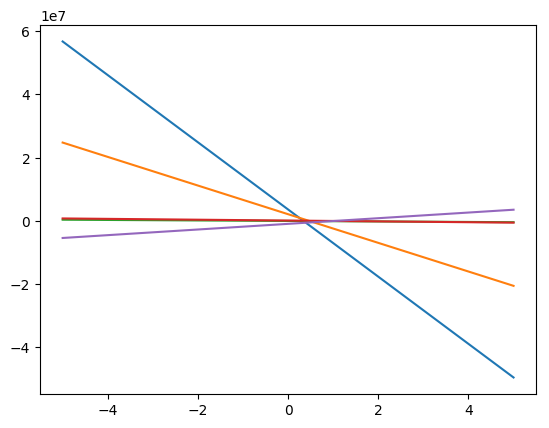

In [6]:
function E_(n, theta)
    return E(n)- theta^2
end
function f(lambda, theta, N)
    A = H(theta,N)
    return det(A-lambda*ones(A))
end
function bisect(f, args=[]) # nur für lineare Funktionen
    a = 1
    while sign(f(a,args...)) == sign(f(-a,args...))
        a *= 2
    end
    left = -a
    right = a
    mid = 0
    while f(mid, args...) > 1e-10
        if f(mid,args...) > 0
            if f(left,args...) > 0
                left = mid
            else
                right = mid
            end
        else
            if f(left,args...) > 0
                right = mid
            else
                left = mid
            end
        end
        mid = (right+left)/2
    end
    return mid
end
lambda = linspace(-5,5)
for omega in linspace(0,2,5)
    plot(lambda, f.(lambda,omega,10)) 
end
show()

Ich habe nicht verstanden wie $f(\lambda)$ linear sein kann.